# PART 1

In [44]:
##### PART 1 - Problem Statement #####

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
import matplotlib.pyplot as plt
import numpy as np
import string
import re

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

In [18]:

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
                'rec.sport.hockey']

twenty_train = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
train_data = twenty_train.data
#train_target = twenty_train.target
train_target = (twenty_train.target[:]>=4)*1

In [22]:
stop_words = text.ENGLISH_STOP_WORDS

# min_df = 3
#tfidf_transformer = TfidfVectorizer(min_df = 3, stop_words = stop_words)
#train_tfidf = tfidf_transformer.fit_transform(train_data)
count_vectorizer = CountVectorizer(min_df = 3, stop_words = stop_words) 
train_counts = count_vectorizer.fit_transform(train_data)
tfidf_transformer = TfidfTransformer(sublinear_tf=True)
train_tfidf = tfidf_transformer.fit_transform(train_counts)
print "For min_df = 3, TFxIDF matrix: " + str(train_tfidf.shape)

For min_df = 3, TFxIDF matrix: (7882, 27768)


# PART 2

In [20]:
##### PART 2 - Apply K-means Clustering #####
# k = 2
km2 = KMeans(n_clusters=2, n_init = 30).fit(train_tfidf)

In [21]:
# a
print "contingency matrix:"
cm = metrics.confusion_matrix(train_target, km2.labels_)
print(cm)
# b
print "Homogeneity Score: %0.3f" % metrics.homogeneity_score(train_target, km2.labels_)
print "Completeness Score: %0.3f" % metrics.completeness_score(train_target, km2.labels_)
print "V-measure: %0.3f" % metrics.v_measure_score(train_target, km2.labels_)
print "Adjusted Rand Score: %.3f"% metrics.adjusted_rand_score(train_target, km2.labels_)
print "Adjusted Mutual Info Score: %.3f"% metrics.adjusted_mutual_info_score(train_target, km2.labels_)

contingency matrix:
[[3899    4]
 [2262 1717]]
Homogeneity Score: 0.253
Completeness Score: 0.335
V-measure: 0.288
Adjusted Rand Score: 0.181
Adjusted Mutual Info Score: 0.253


# PART 3

In [23]:
##### PART 3 - Preprocess the Data #####
# a: Dimensionality Reduction
# r: top principle components; r = from 1 to 1000, i.e. r = 1,2,3,5,10,20,50,100,300
# LSI/SVD only needs r = 1000
#for smaller r’s, only need to exclude the least important features.

# variance ratio retained after truncatedSVD Reduction
SVD = TruncatedSVD(n_components=1000, random_state=42, algorithm="arpack")
reduced_train_tfidf = SVD.fit_transform(train_tfidf)
VR = SVD.explained_variance_ratio_ # percent of variance explained
print(np.sum(VR))

0.534503861455


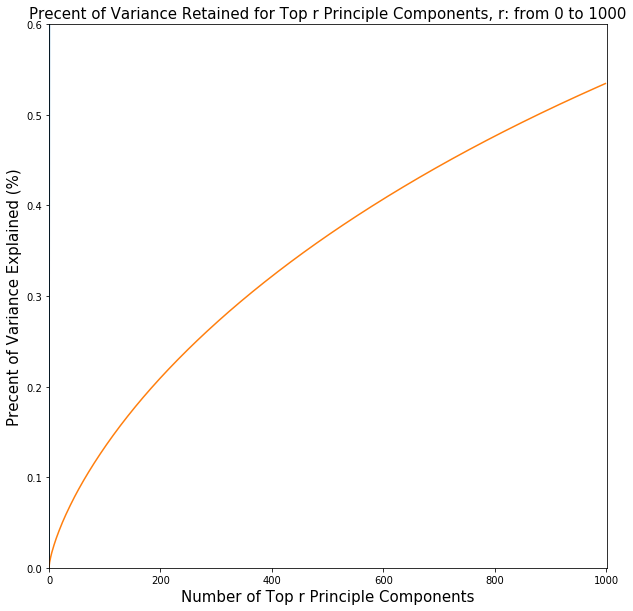

In [24]:
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1])
plt.axis([-0.005, 1002, 0, 0.6])
plt.plot(np.cumsum(VR)) # Return the cumulative sum of the elements along a given axis
plt.ylabel('Precent of Variance Explained (%)', fontsize = 15)
plt.xlabel('Number of Top r Principle Components', fontsize = 15)
plt.title('Precent of Variance Retained for Top r Principle Components, r: from 0 to 1000', fontsize = 15)
plt.show()

In [25]:
print reduced_train_tfidf.shape

(7882, 1000)


In [26]:
### LSI Reduction

r_range = [1,2,3,5,10,20,50,100,300]
homogeneity_score = []
completeness_score = []
v_measure_score = []
adjusted_rand_score = []
adjusted_mutual_info_score = []


for i in r_range:
    print("Number of components: %d" %i)
    SVD = TruncatedSVD(n_components = i)
    transformed_tfidf = SVD.fit_transform(train_tfidf)
    #new_target = (twenty_train.target[:]<4)*1
    km = KMeans(n_clusters=2, n_init=30).fit(transformed_tfidf)
    cm = metrics.confusion_matrix(train_target, km.labels_)
    print("contingency matrix:")
    print(cm)
    #predicted_km = km.fit_predict(transformed_tfidf)
    homogeneity_score.append(metrics.homogeneity_score(train_target, km.labels_))
    print("Homogeneity Score: %0.3f" % metrics.homogeneity_score(train_target, km.labels_))
    completeness_score.append(metrics.completeness_score(train_target, km.labels_))
    print("Completeness Score: %0.3f" % metrics.completeness_score(train_target, km.labels_))
    v_measure_score.append(metrics.v_measure_score(train_target, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(train_target, km.labels_))
    adjusted_rand_score.append(metrics.adjusted_rand_score(train_target, km.labels_))
    print("Adjusted Rand Score: %.3f"% metrics.adjusted_rand_score(train_target, km.labels_))
    adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score(train_target, km.labels_))
    print("Adjusted Mutual Info Score: %.3f"% metrics.adjusted_mutual_info_score(train_target, km.labels_))
    print("=================================================")

Number of components: 1
contingency matrix:
[[1739 2164]
 [1508 2471]]
Homogeneity Score: 0.003
Completeness Score: 0.003
V-measure: 0.003
Adjusted Rand Score: 0.005
Adjusted Mutual Info Score: 0.003
Number of components: 2
contingency matrix:
[[3852   51]
 [ 916 3063]]
Homogeneity Score: 0.525
Completeness Score: 0.543
V-measure: 0.534
Adjusted Rand Score: 0.569
Adjusted Mutual Info Score: 0.525
Number of components: 3
contingency matrix:
[[3898    5]
 [2259 1720]]
Homogeneity Score: 0.253
Completeness Score: 0.334
V-measure: 0.288
Adjusted Rand Score: 0.181
Adjusted Mutual Info Score: 0.253
Number of components: 5
contingency matrix:
[[   2 3901]
 [1629 2350]]
Homogeneity Score: 0.240
Completeness Score: 0.326
V-measure: 0.276
Adjusted Rand Score: 0.162
Adjusted Mutual Info Score: 0.240
Number of components: 10
contingency matrix:
[[3901    2]
 [2254 1725]]
Homogeneity Score: 0.257
Completeness Score: 0.339
V-measure: 0.292
Adjusted Rand Score: 0.183
Adjusted Mutual Info Score: 0.257

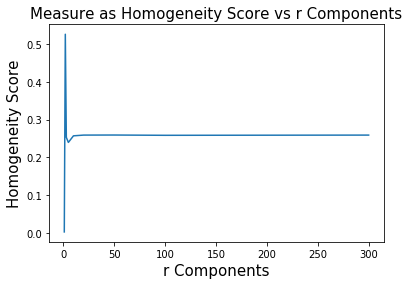

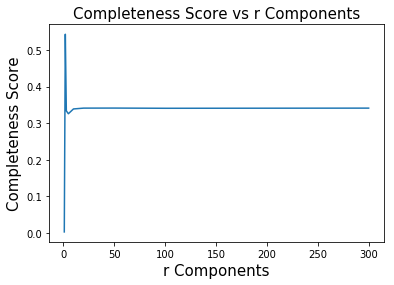

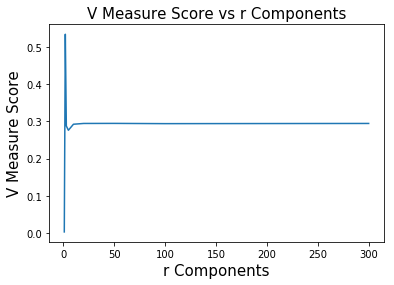

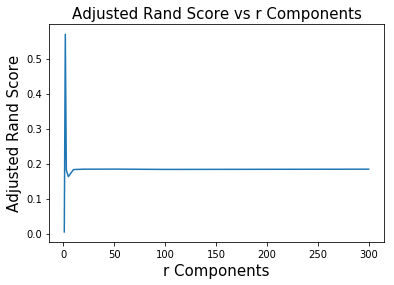

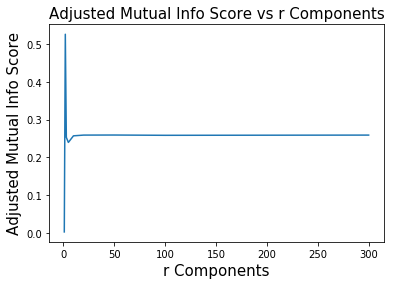

In [27]:
### plot measures vs r
#line = [0, 1]
#plt.figure(figsize=(10,10))
#plt.plot([0,1],[0,1])

plt.plot(r_range, homogeneity_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('Homogeneity Score', fontsize = 15)
plt.title('Measure as Homogeneity Score vs r Components', fontsize = 15)
plt.show()

plt.plot(r_range, completeness_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('Completeness Score', fontsize = 15)
plt.title('Completeness Score vs r Components', fontsize = 15)
plt.show()

plt.plot(r_range, v_measure_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('V Measure Score', fontsize = 15)
plt.title('V Measure Score vs r Components', fontsize = 15)
plt.show()

plt.plot(r_range, adjusted_rand_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('Adjusted Rand Score', fontsize = 15)
plt.title('Adjusted Rand Score vs r Components', fontsize = 15)
plt.show()

plt.plot(r_range, adjusted_mutual_info_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('Adjusted Mutual Info Score', fontsize = 15)
plt.title('Adjusted Mutual Info Score vs r Components', fontsize = 15)
plt.show()

In [28]:
### NMF Reduction
r_range = [1,2,3,5,10,20,50,100,300]
homogeneity_score = []
completeness_score = []
v_measure_score = []
adjusted_rand_score = []
adjusted_mutual_info_score = []

for i in r_range:
    NMF_train = NMF(n_components=i,random_state=42)
    transformed_tfidf = NMF_train.fit_transform(train_tfidf)
    km = KMeans(n_clusters=2, n_init=30).fit(transformed_tfidf)
    cm = metrics.confusion_matrix(train_target, km.labels_)
    print("contingency matrix:")
    print(cm)
    #predicted_km = km.fit_predict(transformed_tfidf)
    homogeneity_score.append(metrics.homogeneity_score(train_target, km.labels_))
    print("Homogeneity Score: %0.3f" % metrics.homogeneity_score(train_target, km.labels_))
    completeness_score.append(metrics.completeness_score(train_target, km.labels_))
    print("Completeness Score: %0.3f" % metrics.completeness_score(train_target, km.labels_))
    v_measure_score.append(metrics.v_measure_score(train_target, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(train_target, km.labels_))
    adjusted_rand_score.append(metrics.adjusted_rand_score(train_target, km.labels_))
    print("Adjusted Rand Score: %.3f"% metrics.adjusted_rand_score(train_target, km.labels_))
    adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score(train_target, km.labels_))
    print("Adjusted Mutual Info Score: %.3f"% metrics.adjusted_mutual_info_score(train_target, km.labels_))
    print("=================================================")

Number of components: 1
Homogeneity Score: 0.003
Completeness Score: 0.003
V-measure: 0.003
Adjusted Rand Score: 0.005
Adjusted Mutual Info Score: 0.003
contingency matrix:
[[1507 2472]
 [1739 2164]]
Number of components: 2
Homogeneity Score: 0.587
Completeness Score: 0.597
V-measure: 0.592
Adjusted Rand Score: 0.654
Adjusted Mutual Info Score: 0.587
contingency matrix:
[[ 689 3290]
 [3837   66]]
Number of components: 3
Homogeneity Score: 0.247
Completeness Score: 0.331
V-measure: 0.283
Adjusted Rand Score: 0.171
Adjusted Mutual Info Score: 0.247
contingency matrix:
[[1668 2311]
 [   2 3901]]
Number of components: 5
Homogeneity Score: 0.223
Completeness Score: 0.314
V-measure: 0.261
Adjusted Rand Score: 0.144
Adjusted Mutual Info Score: 0.223
contingency matrix:
[[2442 1537]
 [3901    2]]
Number of components: 10
Homogeneity Score: 0.237
Completeness Score: 0.323
V-measure: 0.273
Adjusted Rand Score: 0.159
Adjusted Mutual Info Score: 0.237
contingency matrix:
[[2367 1612]
 [3901    2]]

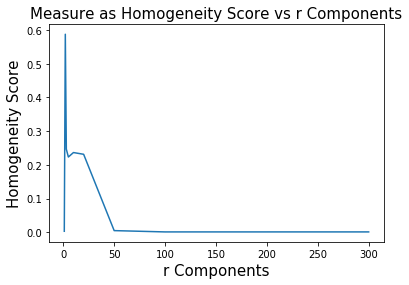

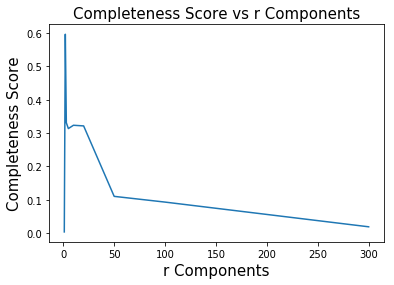

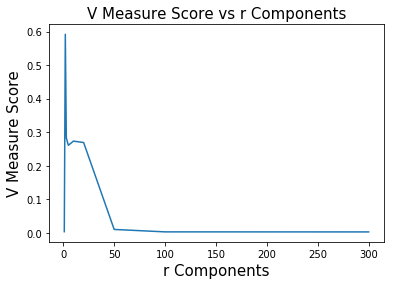

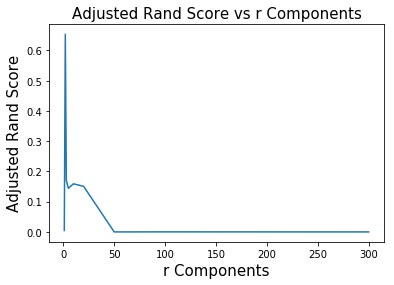

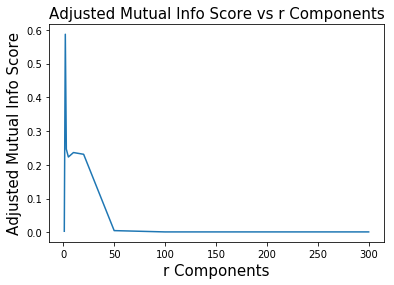

In [29]:
plt.plot(r_range, homogeneity_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('Homogeneity Score', fontsize = 15)
plt.title('Measure as Homogeneity Score vs r Components', fontsize = 15)
plt.show()

plt.plot(r_range, completeness_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('Completeness Score', fontsize = 15)
plt.title('Completeness Score vs r Components', fontsize = 15)
plt.show()

plt.plot(r_range, v_measure_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('V Measure Score', fontsize = 15)
plt.title('V Measure Score vs r Components', fontsize = 15)
plt.show()

plt.plot(r_range, adjusted_rand_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('Adjusted Rand Score', fontsize = 15)
plt.title('Adjusted Rand Score vs r Components', fontsize = 15)
plt.show()

plt.plot(r_range, adjusted_mutual_info_score)
plt.xlabel('r Components', fontsize = 15)
plt.ylabel('Adjusted Mutual Info Score', fontsize = 15)
plt.title('Adjusted Mutual Info Score vs r Components', fontsize = 15)
plt.show()

In [30]:
### Question: How do you explain the non-monotonic behavior of the measures as r increases?

# PART 4

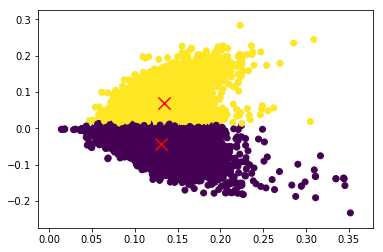

In [46]:
##### PART 4 #####
# a. 2-D projection of final data vectors and colorcoding, with best r for clustering results

# LSI
# r = 2
SVD = TruncatedSVD(n_components=2,random_state=42)
tfidf_lsi_best = SVD.fit_transform(train_tfidf)
km_lsi_best = KMeans(n_clusters=2, n_init=30)
predict_km = km_lsi_best.fit_predict(tfidf_lsi_best)

centroids = km_lsi_best.cluster_centers_

#plt.figure(figsize=(10,10))
plt.scatter(tfidf_svd_best[:,0], tfidf_svd_best[:,1], c = predict_km)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150,color='r')
plt.show()

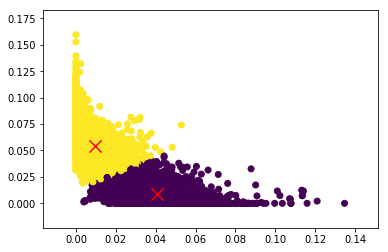

In [40]:
#NMF 
# r = 2


NMF_train = NMF(n_components=2,random_state=42)
tfidf_nmf_best = NMF_train.fit_transform(train_tfidf)
km_nmf_best = KMeans(n_clusters=2,n_init=30)
predict_km_lsi = km_nmf_best.fit_predict(tfidf_nmf_best)

centroids = km_nmf_best.cluster_centers_

#plt.figure(figsize=(10,10))
plt.scatter(tfidf_nmf_best[:,0], tfidf_nmf_best[:,1], c = predict_km_lsi)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150,color='r')
plt.show()


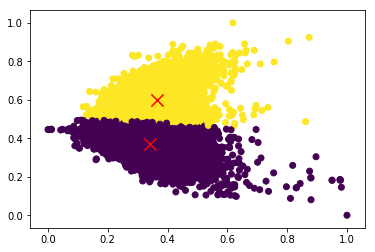

Contingency Matrix for LSI Feature Normalization:
[[3874   29]
 [1222 2757]]
Homogeneity: 0.457
Completeness: 0.487
V-measure: 0.471
Adjusted Rand-Index: 0.466
Adjusted Mutual info score: 0.457


In [50]:
# b. Three methods that could increase performance; for each: repeat part a, report new measures 
# i. Feature Normalizationfrom sklearn.preprocessing import normalize

# LSI
#tfidf_svd_norm = normalize(tfidf_svd_best)
min_max_scaler = MinMaxScaler()
tfidf_lsi_norm = min_max_scaler.fit_transform(tfidf_lsi_best)
tfidf_lsi_norm[tfidf_lsi_norm<1e-10] = 1e-10

km_lsi_norm = KMeans(n_clusters=2, n_init=30).fit(tfidf_lsi_norm)

centroids = km_lsi_norm.cluster_centers_

#plt.figure(figsize=(10,10))
plt.scatter(tfidf_lsi_norm[:,0], tfidf_lsi_norm[:,1], c = km_lsi_norm.labels_)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150,color='r')
plt.show()

print("Contingency Matrix for LSI Feature Normalization:")
cm = metrics.confusion_matrix(train_target, km_lsi_norm.labels_)
print(cm)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_target, km_lsi_norm.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_target, km_lsi_norm.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_target, km_lsi_norm.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(train_target, km_lsi_norm.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(train_target, km_lsi_norm.labels_))

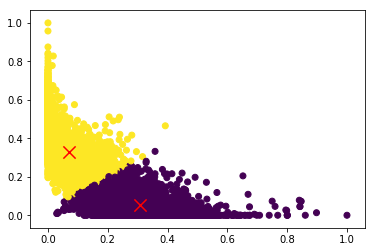

Contingency Matrix for NMF Feature Normalization:
[[3824   79]
 [ 537 3442]]
Homogeneity: 0.633
Completeness: 0.638
V-measure: 0.636
Adjusted Rand-Index: 0.712
Adjusted Mutual info score: 0.633


In [53]:
# NMF

min_max_scaler = MinMaxScaler()
tfidf_nmf_norm = min_max_scaler.fit_transform(tfidf_nmf_best)
tfidf_nmf_norm[tfidf_nmf_norm<1e-10] = 1e-10


km_nmf_norm = KMeans(n_clusters=2, n_init=30).fit(tfidf_nmf_norm)

centroids_nmf = km_nmf_norm.cluster_centers_

#plt.figure(figsize=(10,10))
plt.scatter(tfidf_nmf_norm[:,0], tfidf_nmf_norm[:,1], c = km_nmf_norm.labels_)
plt.scatter(centroids_nmf[:, 0], centroids_nmf[:, 1], marker='x', s=150, color='r')
plt.show()

print("Contingency Matrix for NMF Feature Normalization:")
cm = metrics.confusion_matrix(train_target, km_nmf_norm.labels_)
print(cm)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_target, km_nmf_norm.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_target, km_nmf_norm.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_target, km_nmf_norm.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(train_target, km_nmf_norm.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(train_target, km_nmf_norm.labels_))

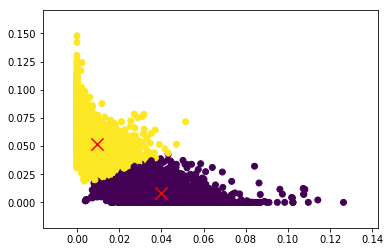

Contingency Matrix for Logarithm Non-linear Transformation:
[[3833   70]
 [ 649 3330]]
Homogeneity: 0.598
Completeness: 0.606
V-measure: 0.602
Adjusted Rand-Index: 0.668
Adjusted Mutual info score: 0.598


In [54]:
#ii. Logarithm Transformation to data vectors only after NMF 
#### quesiton: Can you justify why logarithm transformation may increase the clustering results?

logtransformer = FunctionTransformer(np.log1p)
tfidf_nmf_log = logtransformer.transform(tfidf_nmf_best)

km_log = KMeans(n_clusters=2, n_init=30).fit(tfidf_nmf_log)

centroids_log = km_log.cluster_centers_

#plt.figure(figsize=(10,10))
plt.scatter(tfidf_nmf_log[:,0], tfidf_nmf_log[:,1], c = km_log.labels_)
plt.scatter(centroids_log[:, 0], centroids_log[:, 1], marker='x', s=150,color='r')
plt.show()

print("Contingency Matrix for Logarithm Non-linear Transformation:")
cm = metrics.confusion_matrix(train_target, km_log.labels_)
print(cm)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_target, km_log.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_target, km_log.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_target, km_log.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(train_target, km_log.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(train_target, km_log.labels_))

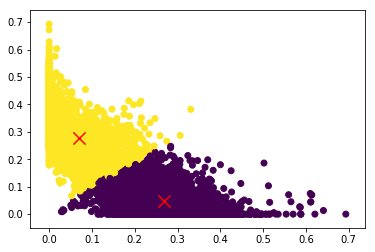

Contingency Matrix for Combined Transformation Nor + Log :
[[3803  100]
 [ 475 3504]]
Homogeneity: 0.643
Completeness: 0.647
V-measure: 0.645
Adjusted Rand-Index: 0.729
Adjusted Mutual info score: 0.643


In [55]:
#iii. Combining both transformations (in different orders) on NMF- reduced data.
# nor+log

min_max_scaler = MinMaxScaler()
tfidf_nmf_norm = min_max_scaler.fit_transform(tfidf_nmf_best)
tfidf_nmf_norm[tfidf_nmf_norm<1e-10] = 1e-10

tfidf_nmf_norm_log = logtransformer.transform(tfidf_nmf_norm)
km_nor_log = KMeans(n_clusters=2, n_init=30).fit(tfidf_nmf_norm_log)

centroids_nl = km_nor_log.cluster_centers_

#plt.figure(figsize=(10,10))
plt.scatter(tfidf_nmf_norm_log[:,0], tfidf_nmf_norm_log[:,1], c = km_nor_log.labels_)
plt.scatter(centroids_nl[:, 0], centroids_nl[:, 1], marker='x', s=150,color='r')
plt.show()

print("Contingency Matrix for Combined Transformation Nor + Log :")
cm = metrics.confusion_matrix(train_target,km_nor_log.labels_)
print(cm)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_target, km_nor_log.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_target, km_nor_log.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_target, km_nor_log.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(train_target, km_nor_log.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(train_target, km_nor_log.labels_))

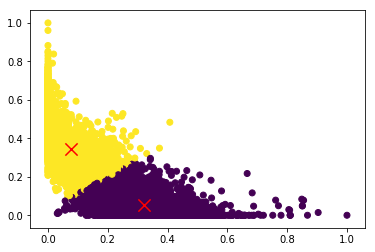

Contingency Matrix for Combined Transformation Log + Nor :
[[3817   86]
 [ 517 3462]]
Homogeneity: 0.636
Completeness: 0.640
V-measure: 0.638
Adjusted Rand-Index: 0.717
Adjusted Mutual info score: 0.636


In [60]:
#log + nor 

tfidf_nmf_log = logtransformer.transform(tfidf_nmf_best)

min_max_scaler = MinMaxScaler()
tfidf_nmf_log_norm = min_max_scaler.fit_transform(tfidf_nmf_log)
tfidf_nmf_log_norm[tfidf_nmf_log_norm<1e-10] = 1e-10

km_log_nor = KMeans(n_clusters=2, n_init=30).fit(tfidf_nmf_log_norm)

centroids_ln = km_log_nor.cluster_centers_

#plt.figure(figsize=(10,10))
plt.scatter(tfidf_nmf_log_norm[:,0], tfidf_nmf_log_norm[:,1], c = km_log_nor.labels_)
plt.scatter(centroids_ln[:, 0], centroids_ln[:, 1], marker='x', s=150,color='r')
plt.show()

print("Contingency Matrix for Combined Transformation Log + Nor :")
cm = metrics.confusion_matrix(train_target, km_log_nor.labels_)
print(cm)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_target, km_log_nor.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_target, km_log_nor.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_target, km_log_nor.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(train_target, km_log_nor.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(train_target, km_log_nor.labels_))

# PART 5